In [1]:
import numpy as np

embeddings=np.load('/home/maria/Documents/CarsenMariusData/6845348/embeddings.npy')

In [2]:
print(embeddings.shape)

(2800, 768)


In [7]:
path="/home/maria/Documents/CarsenMariusData/6845348/natimg2800_M161025_MP030_2017-05-29.mat"

import scipy.io
import matplotlib.pyplot as plt
import numpy as np

mat = scipy.io.loadmat(path)
print(mat.keys())

#print(mat['stat'])
print(mat['db'])
print(mat['stim'][0].shape)
print(mat['stim'][0][0][0].shape)
events=mat['stim'][0][0][1].T
print(events.shape)
print(events[0,:].nonzero()[0].shape)

dict_keys(['__header__', '__version__', '__globals__', 'db', 'med', 'stat', 'stim'])
[[(array(['M161025_MP030'], dtype='<U13'), array(['TETO_G6s'], dtype='<U8'), array(['2017-05-29'], dtype='<U10'), array([[5, 6, 2]], dtype=uint8), array([[12]], dtype=uint8), array([[1]], dtype=uint8), array([[array(['spont_gray'], dtype='<U10'),
          array(['natimg2800'], dtype='<U10'),
          array(['natimg2800'], dtype='<U10')]], dtype=object), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64))]]
(1,)
(2565, 14062)
(14062, 5658)
(2514,)


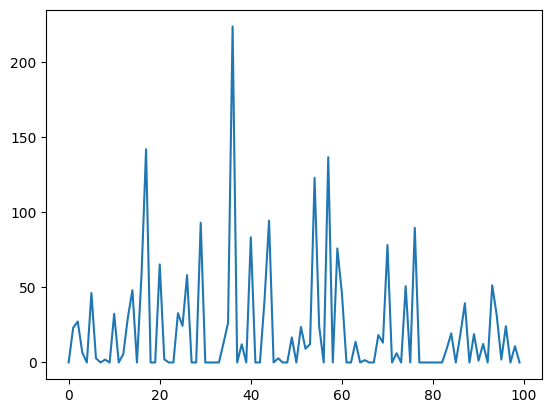

In [9]:
plt.plot(events[0,:100])

In [36]:
events=mat['stim'][0][0][0]
images=mat['stim'][0][0][1]
sequences=mat['stim'][0][0][2].flatten()

In [37]:
print(sorted(sequences))

from collections import Counter

print(Counter(sequences))

[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 50, 50, 51, 51, 52, 52, 53, 53, 54, 54, 55, 55, 56, 56, 57, 57, 58, 58, 59, 59, 60, 60, 61, 61, 62, 62, 63, 63, 64, 64, 65, 65, 66, 66, 67, 67, 68, 68, 69, 70, 70, 71, 71, 72, 72, 73, 73, 74, 74, 75, 75, 76, 76, 77, 78, 78, 79, 79, 80, 80, 81, 81, 82, 82, 83, 83, 84, 84, 85, 85, 86, 86, 87, 87, 88, 89, 89, 90, 90, 91, 91, 92, 93, 93, 94, 94, 95, 95, 96, 96, 97, 97, 98, 98, 99, 99, 100, 100, 101, 101, 102, 102, 103, 103, 104, 104, 105, 105, 106, 106, 107, 107, 108, 109, 109, 110, 111, 111, 112, 112, 113, 114, 114, 115, 115, 116, 116, 117, 117, 118, 118, 119, 119, 120, 120, 121, 121, 122, 122, 123, 123, 124, 124, 125, 125, 126, 126

In [29]:
images[sequences==12801].shape

(0, 14062)

In [35]:
print(images.shape)

(5658, 14062)


In [34]:
images_nonempty=events[sequences!=2801]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 2565 but corresponding boolean dimension is 5658

In [31]:
print(images_nonempty.shape)

(5390, 14062)


In [9]:
print(images.shape)
print(events.shape)

(5658, 14062)
(2565, 14062)


In [17]:
print(mat['stim'][0][0][2].shape)
print(max(mat['stim'][0][0][2]))

(5658, 1)
[2801]


In [18]:
scipy.io.loadmat('/home/maria/Documents/CarsenMariusData/6845348/dbstims.mat')

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Jul 19 15:47:27 2018',
 '__version__': '1.0',
 '__globals__': [],
 'dbstims': array([[(array(['M160825_MP027'], dtype='<U13'), array(['EMX_G6s'], dtype='<U7'), array(['2016-12-14'], dtype='<U10'), array([[1, 2, 3, 5]], dtype=uint8), array([[12]], dtype=uint8), array([[1.2]]), array([[array(['natimg2800'], dtype='<U10'),
                 array(['natimg2800'], dtype='<U10'),
                 array(['spont_black'], dtype='<U11'),
                 array(['spont_black'], dtype='<U11')]], dtype=object), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64), array([[7931, 7932, 7933, 7934, 7935, 7936, 7937, 7938, 7939, 7940, 7941,
                 7942, 7943, 7944, 7945, 7946, 7947, 7948, 7949, 7950, 7951, 7952,
                 7953, 7954, 7955, 7956]], dtype=uint16), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64), array([],

In [2]:
from transformers import ViTForImageClassification

# Load the pretrained classification model
model_name = 'google/vit-base-patch16-224'
model = ViTForImageClassification.from_pretrained(model_name)

# Extract the classification head weights
classification_weights = model.classifier.weight.data  # Shape: [num_classes, hidden_dim]
classification_bias = model.classifier.bias.data       # Shape: [num_classes]

print("Classification weights shape:", classification_weights.shape)
print("Classification weights:", classification_weights)

print("Classification bias shape:", classification_bias.shape)
print("Classification bias:", classification_bias)


Classification weights shape: torch.Size([1000, 768])
Classification weights: tensor([[-0.0185,  0.0317, -0.0175,  ..., -0.0125,  0.0481, -0.0027],
        [-0.0412,  0.0001,  0.0059,  ...,  0.0216,  0.0190, -0.0097],
        [-0.0507,  0.0458, -0.0032,  ..., -0.0404,  0.0268,  0.0041],
        ...,
        [ 0.0350, -0.0040,  0.0212,  ..., -0.0145,  0.0315, -0.0010],
        [-0.0142, -0.0176,  0.0233,  ...,  0.0357,  0.0003,  0.0048],
        [ 0.0355, -0.0146,  0.0444,  ..., -0.0302, -0.0331,  0.0526]])
Classification bias shape: torch.Size([1000])
Classification bias: tensor([-6.7698e-03, -6.5266e-03, -1.5560e-02, -2.5580e-02, -1.4573e-02,
         1.3010e-02, -2.0093e-02, -3.6323e-03,  8.8541e-04, -2.7965e-03,
         3.7696e-03, -1.8226e-02, -1.2936e-02, -1.4089e-02, -1.3382e-02,
        -7.5641e-03, -5.2060e-03, -6.0033e-03,  5.9489e-03, -5.4119e-03,
         7.3440e-04,  1.1496e-02, -1.5496e-02,  3.5638e-04, -1.2281e-02,
        -1.9401e-02,  1.2315e-02, -2.0173e-02, -1.9029e-